In [40]:
import geopandas as gpd
import glob
import os
from osgeo import ogr
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

<Axes: >

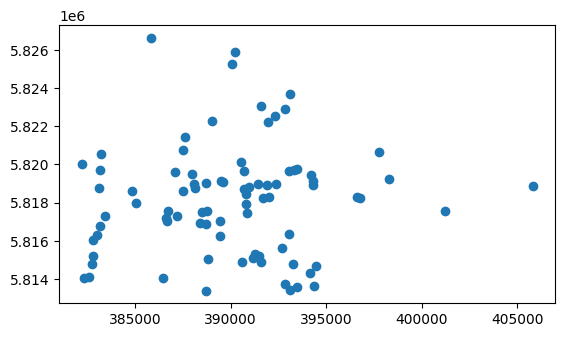

In [41]:
points=gpd.read_file('C:/Users/user/Downloads/Flood ML/Berlin/CNN/Sample_points/Points.shp')
points.plot()

In [42]:
points

,Label,geometry
0,0,POINT Z (382328.441 5814043.781 0.000)
1,0,POINT Z (382580.854 5814097.359 0.000)
2,0,POINT Z (382758.655 5814802.211 0.000)
3,0,POINT Z (382782.361 5815220.465 0.000)
4,0,POINT Z (382814.111 5816035.383 0.000)
...,...,...
79,1,POINT Z (385859.976 5826640.279 0.000)
80,1,POINT Z (390211.685 5825885.787 0.000)
81,1,POINT Z (384826.269 5818605.934 0.000)
82,1,POINT Z (387205.115 5817324.760 0.000)


In [43]:
buffer_dist=115 #buffer distance = image size x spatial resolution /2

points=gpd.read_file('C:/Users/user/Downloads/Flood ML/Berlin/CNN/Sample_points/Points.shp')

# Create square buffers with a side length of buffer_dist units around the point features
points['geometry'] = points.buffer(buffer_dist)

points['geometry'] = points.geometry.envelope

# Save the new shapefile
points.to_file("C:/Users/user/Downloads/Flood ML/Berlin/CNN/squares.shp")

In [44]:
# Iterate over each feature in the shapefile
square_points=gpd.read_file('C:/Users/user/Downloads/Flood ML/Berlin/CNN/squares.shp')
square_points

,Label,geometry
0,0,"POLYGON ((382213.441 5813928.781, 382213.441 5..."
1,0,"POLYGON ((382465.854 5813982.359, 382465.854 5..."
2,0,"POLYGON ((382643.655 5814687.211, 382643.655 5..."
3,0,"POLYGON ((382667.361 5815105.465, 382667.361 5..."
4,0,"POLYGON ((382699.111 5815920.383, 382699.111 5..."
...,...,...
79,1,"POLYGON ((385744.976 5826525.279, 385744.976 5..."
80,1,"POLYGON ((390096.685 5825770.787, 390096.685 5..."
81,1,"POLYGON ((384711.269 5818490.934, 384711.269 5..."
82,1,"POLYGON ((387090.115 5817209.760, 387090.115 5..."


In [45]:
# Iterate over each feature in the shapefile
# Split the flooded and nonflooded points 
for index, feature in square_points.iterrows():
    feature_gdf = square_points.iloc[[index]]       
    # Save the feature to a new shapefile
    feature_gdf.to_file(r"C:\Users\user\Downloads\Flood ML\Berlin\CNN\Divided\feature_{}.shp".format(index))

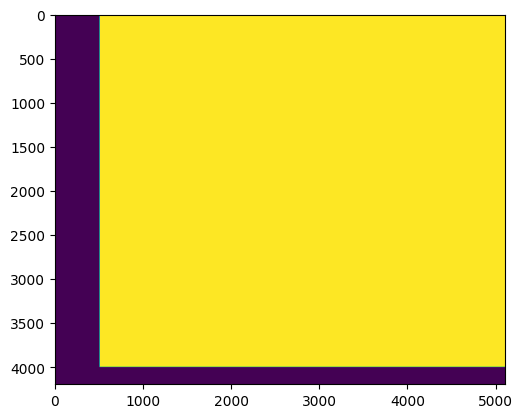

In [46]:
# Read raster files with GDAL
# import 
ds = gdal.Open(r"C:\Users\user\Downloads\Flood ML\Berlin\CNN\Composite_Berlin.tif") # open a raster with several bands, each band  represent one predictive feature
gt= ds.GetGeoTransform() #get the transformation data
proj = ds.GetProjection() #get the projection

band = ds.GetRasterBand(1) #read the first band 
array = band.ReadAsArray() #read the first band as an array

plt.figure()  #plot the raster to check that you every thing is working well
plt.imshow(array)

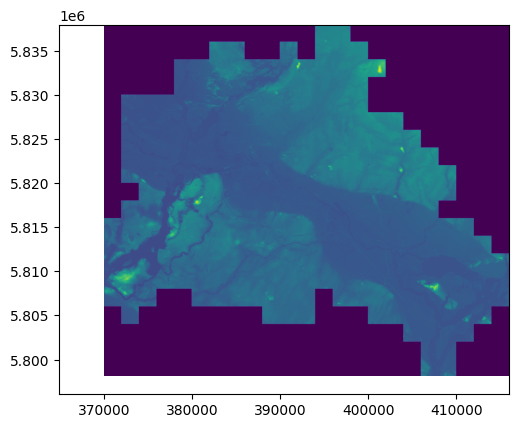

<Axes: >

In [47]:
import rasterio as rio
from rasterio.plot import show
composite_path = r"C:\Users\user\Downloads\Flood ML\Berlin\CNN\Composite_Berlin.tif"
dataset = rio.open(composite_path)
show(dataset)

In [48]:
# change the path to the folder where we saved the splitted polygons
shp_path=r"C:\Users\user\Downloads\Flood ML\Berlin\CNN\Divided"
os.chdir(shp_path)
shp_file = glob.glob('*.shp')
#index =0
for file in shp_file:
        #print(str(file))         
        ds2 = ogr.Open(file, 1)
        layer = ds2.GetLayer()
        shp_ds=gpd.read_file(file)
        if shp_ds['Label'][0] == 0 : # clip and save not flooded locations
             #Save the feature to a new shapefile
            dsClip = gdal.Warp(r"C:\Users\user\Downloads\Flood ML\Berlin\CNN\Predictive_features\NotFlooded\feature_"+str(file[:-4])+".tif", ds, cutlineDSName = file,
                       cropToCutline = True, dstNodata = np.nan)
        else: # clip and save flooded locations
            # Save the feature to a new shapefile
            dsClip = gdal.Warp(r"C:\Users\user\Downloads\Flood ML\Berlin\CNN\Predictive_features\Flooded\feature_"+str(file[:-4])+".tif", ds, cutlineDSName = file,
                       cropToCutline = True, dstNodata = np.nan)

In [49]:
import rasterio

# Open the DEM file
dem_file = r"C:\Users\user\Downloads\Flood ML\Berlin\CNN\Features\DEM.tif"
with rasterio.open(dem_file) as dataset:
    # Get the resolution (pixel size) of the DEM
    resolution = dataset.res

# Print the resolution
print("DEM Resolution: {} x {}".format(resolution[0], resolution[1]))

DEM Resolution: 10.0 x 10.0


In [50]:
import rasterio

# Open the DEM file
dem_file = r"C:\Users\user\Downloads\Flood ML\Berlin\CNN\Predictive_features\NotFlooded\feature_feature_0.tif"
with rasterio.open(dem_file) as dataset:
    # Get the image size (number of rows and columns)
    image_size = dataset.shape

# Print the image size
print("Image Size: {} x {}".format(image_size[0], image_size[1]))

Image Size: 22 x 22


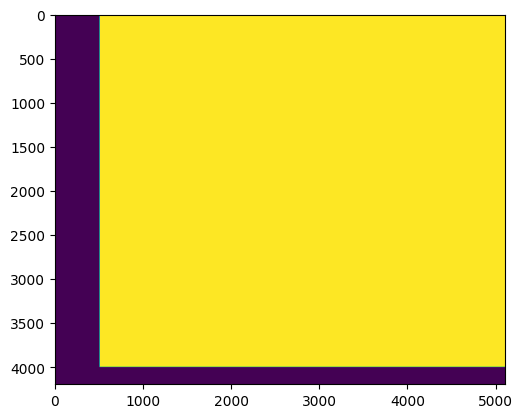

In [51]:
import rasterio

# Open the raster file
file_path = r"C:\Users\user\Downloads\Flood ML\Berlin\CNN\Composite_Berlin.tif"
dataset = rasterio.open(file_path)

# Read metadata
transform = dataset.transform
projection = dataset.crs

# Read a specific band
band_number = 1
band = dataset.read(band_number)

# Plot the raster
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(band)


In [52]:
# "# Change directory to the folder where the shapefiles are saved
# import os
# from rasterio.mask import mask
# os.chdir(r"C:\Users\user\Downloads\Flood ML\Berlin\CNN\Divided")

# # Read shapefiles using geopandas
# import geopandas as gpd
# shapefiles = glob.glob('*.shp')

# for shapefile in shapefiles:
#     # Open the shapefile
#     gdf = gpd.read_file(shapefile)
    
#     if gdf['Label'][0] == 0:  # Clip and save not flooded locations
#         output_path = r"C:\Users\user\Downloads\Flood ML\Berlin\CNN\Predictive_features\NotFlooded\feature_" + str(shapefile[:-4]) + ".tif"
#     else:  # Clip and save flooded locations
#         output_path = r"C:\Users\user\Downloads\Flood ML\Berlin\CNN\Predictive_features\Flooded\feature_" + str(shapefile[:-4]) + ".tif"
    
#     # Clip the raster using the shapefile
#     shapes = gdf.geometry
#     clipped_data, clipped_transform = mask(dataset, shapes, crop=True)
    
#     # Update the metadata for the clipped raster
#     clipped_meta = dataset.meta.copy()
#     clipped_meta.update({
#         "driver": "GTiff",
#         "height": clipped_data.shape[1],
#         "width": clipped_data.shape[2],
#         "transform": clipped_transform
#     })
    
#     # Save the clipped raster to a new file
#     with rasterio.open(output_path, "w", **clipped_meta) as dst:
#         dst.write(clipped_data)"

In [53]:
import rasterio

# Open the DEM file
dem_file = r"C:\Users\user\Downloads\Flood ML\Berlin\CNN\Predictive_features\Flooded\feature_feature_56.tif"
with rasterio.open(dem_file) as dataset:
    # Get the image size (number of rows and columns)
    image_size = dataset.shape

# Print the image size
print("Image Size: {} x {}".format(image_size[0], image_size[1]))

Image Size: 22 x 22
